# Name: Nisrin Dhoondia

GitHub: https://github.com/mygoal-javadeveloper

Kaggle: https://www.kaggle.com/nisrindhoondia

My Portfolio (Github and others): https://linktr.ee/nisrindhoondia


# The Sparks Foundation
# GRIP: Data Science & Business Analytics Intern
# Prediction using Supervised ML 
# Task 1

# Simple Linear Regression

This is a simple linear regression task and the dataset has just two variables.

Goal: Predict the percentage of marks a student can score based on the number of hours he dedicates on his studies.



In [1]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
#reading csv file and assigning to dataset variable
dataset = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#getting the overview of all the columns in the dataset
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

Let us rename the column names as per the Python Naming Convention, for better readability and understanding.

Though this is not mandatory but it is a good practice to follow.

In [4]:
dataset.rename(columns={'Hours': 'study_hours', 'Scores': 'percentage_scores'}, inplace = True)

In [5]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   study_hours        25 non-null     float64
 1   percentage_scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#converting percentage_scores column dtype to float32 as percentage_scores can be in decimal 
#and also chances are there our LinearRegression model may predict percentage_scores in decimal
#Also reducing study_hours dtype from float64 to float32 as max study_hours will have only 2 decimals for minutes, say 1.59 - one hour 59 minutes
dataset['study_hours'] = dataset['study_hours'].astype('float32')
dataset['percentage_scores'] = dataset['percentage_scores'].astype('float32')

In [7]:
#checking the columns dtype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   study_hours        25 non-null     float32
 1   percentage_scores  25 non-null     float32
dtypes: float32(2)
memory usage: 328.0 bytes


In [8]:
#first 5 rows content of the dataset
dataset.head()

,study_hours,percentage_scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [9]:
#shape of dataset
dataset.shape

(25, 2)

it is a very small dataset. And there are no missing values. And both columns values are numeric.

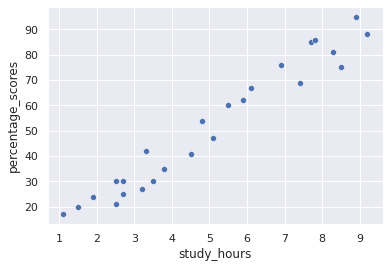

In [10]:
#plotting the the relationship between percentage_scores and study_hours
sns.set(style = 'darkgrid')
sns.scatterplot(x = 'study_hours', y = 'percentage_scores', data = dataset)
plt.show()

As seen in above scatter plot that student who study for less hours scores less whereas student who study for more hours scores more. Basically the percentage of scores is more or less same as the number of hours input in study.
Thus there is a positive linear correlation between the hours of study and percentage of scores.




Preparing the data for model training and evaluation

In [11]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [12]:
#initializing the X (independent variables / study_hours) and y (dependent variable / percentage_scores)
X = dataset.drop('percentage_scores', axis = 1)
y = dataset['percentage_scores']

In [13]:
#splitting X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
 #finding the shape of X_train, X_test, y_train, y_test
 X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [15]:
#creating object of our LinearRegression model
model = LinearRegression()

In [16]:
#training our LinearRegression model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

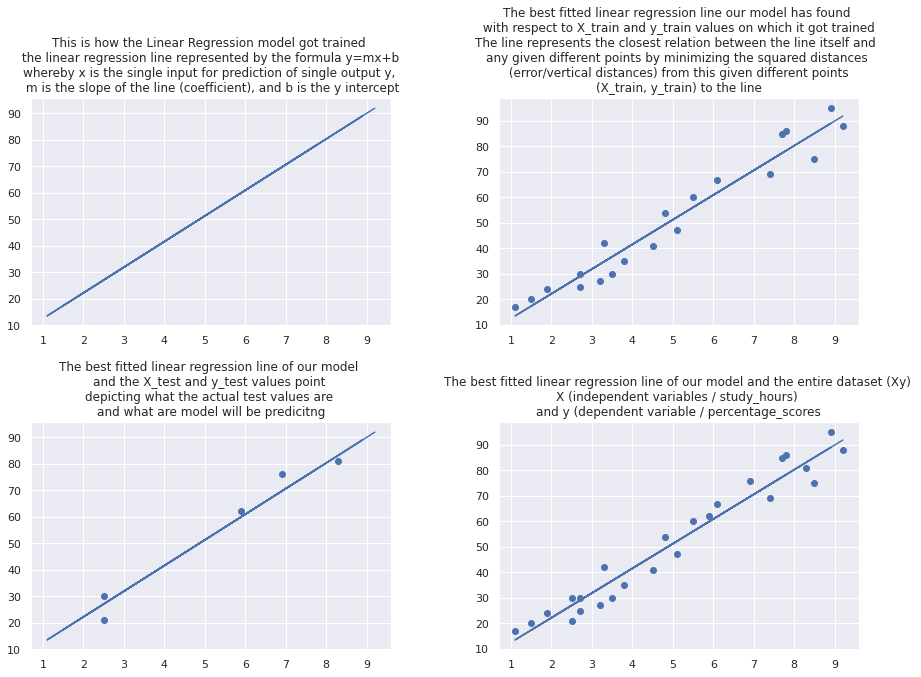

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14,10))
fig.tight_layout(pad=6.0)

#the regression line produced when the Linear Regression model got trained
line = model.coef_*X_train + model.intercept_   #y=mx+b


ax[0, 0].set_title('This is how the Linear Regression model got trained \n the linear regression line represented by the formula y=mx+b \n'
'whereby x is the single input for prediction of single output y, \n m is the slope of the line (coefficient), and b is the y intercept')
ax[0, 0].plot(X_train, line)

ax[0, 1].set_title('The best fitted linear regression line our model has found \n with respect to X_train and y_train values on which it got trained \n'
'The line represents the closest relation between the line itself and  \n'
'any given different points by minimizing the squared distances \n '
'(error/vertical distances) from this given different points \n'
'(X_train, y_train) to the line')
ax[0, 1].scatter(X_train, y_train)            
ax[0, 1].plot(X_train, line)

ax[1, 0].set_title('The best fitted linear regression line of our model \n'
'and the X_test and y_test values point \n'
'depicting what the actual test values are \n'
'and what are model will be predicitng')
ax[1, 0].scatter(X_test, y_test)            
ax[1, 0].plot(X_train, line)

ax[1, 1].set_title('The best fitted linear regression line of our model and the entire dataset (Xy) \n'
'X (independent variables / study_hours) \n'
'and y (dependent variable / percentage_scores')
ax[1, 1].scatter(X, y)            
ax[1, 1].plot(X_train, line)

plt.show()

In [18]:
#predicting the percentage_scores for X_test
pred = model.predict(X_test)

In [19]:
#comparing Actual vs Predicted
predictiondata = pd.DataFrame({'test_studyhours': X_test['study_hours'], 'actual_percentscores': y_test, 'predicted_percentscores': pred})  
predictiondata

,test_studyhours,actual_percentscores,predicted_percentscores
8,8.3,81.0,83.188141
16,2.5,30.0,27.032085
0,2.5,21.0,27.032085
23,6.9,76.0,69.633232
11,5.9,62.0,59.951153


In [20]:
#r2_score (coefficient of determination) regression score function.
#the coefficient of how well the values fit compared to the original values. 
r2_score(y_test, pred) 

0.9678055611214291

In [21]:
#evaluating the performance of the model
#MAE
print('MAE:')
print(mean_absolute_error(y_test, pred), end='\n')
#MSE
print('MSE:')
print(mean_squared_error(y_test, pred), end='\n')
#RMSE
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, pred)))

MAE:
3.920751
MSE:
18.943209
RMSE:
4.35238


What will be predicted score if a student studies for 9.25 hrs/ day?

In [22]:
hours = pd.DataFrame({'study_hours': [9.25]})
unseenpred = model.predict(hours)
print("No of Hours = {}".format(hours['study_hours'][0]))
print("Predicted Score = {}".format(unseenpred[0]))

No of Hours = 9.25
Predicted Score = 92.38611388206482
